<a href="https://colab.research.google.com/github/Geek-ubaid/Deep-OCR/blob/master/Digit_By_digit_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Digit-by-digit method using MNIST Model

In [0]:
import cv2
import os
import pandas as pd
import shutil

### Generating Indiviual Digits from frames of console (Already Completed no need to run again)

In [0]:
class cutDigits:

    def __init__(self, image=None, src_file_name=None, dst_folder_name='Datasets_digits', last_digit=4, labels=None):
        
        if image is None :
            self.image = cv2.imread(src_file_name)
        else:
            self.image = image
        self.src_file_name = src_file_name
        self.dst_folder_name = dst_folder_name
        self.last_digit=last_digit
        self.labels = labels

        self.box_size = None
        self.boxes = []



    def get_bounding_box_dummy(self):
       
        self.boxes = []
        self.box_size = self.image.shape[1]/4

        for i in range(self.last_digit):
            inf = i * self.box_size
            sup = (i+1) * self.box_size
            self.boxes += [self.image[:, int(inf):int(sup)]]


    def save_to_folder(self) :
       
        if self.dst_folder_name is None :
            return

        for i in range(len(self.boxes)):
            if self.labels :
                box = self.boxes[i]
                label = self.labels[i]
                src_file_name = self.src_file_name.split('/')[-1].split('.')[0]
                dst_file_name = '/content/drive/My Drive/TARP PROJECT/Datasets_digits/%s/%s_%s.jpg' % (label, src_file_name, str(i))
                print(dst_file_name)
                cv2.imwrite(dst_file_name, box)
                
            else:
                pass

In [0]:
import pandas as pd
import os

root_dir = '/content/drive/My Drive/TARP PROJECT'

digits_path = os.path.join(root_dir,'Datasets_digits/')

if os.path.exists(digits_path):
    shutil.rmtree(digits_path)
    for i in range(0,11):
        os.makedirs(digits_path + f'/{i}')
else:
    for i in range(0,11):
        os.makedirs(digits_path + f'/{i}')

# TODO: check why they fail

fail = 0

df = []
# NB: These 3 datasets were made with Excel

suffix = ".csv"
csv_directory = os.path.join(root_dir,'Datasets/')
csv_files = [i for i in os.listdir(csv_directory) if i.endswith( suffix )]
df = []
for i in range(len(csv_files)):
    data = pd.read_csv(csv_directory +csv_files[i], sep=';', index_col = 0)
    df.append(data)
        
df = pd.concat(df, axis=0)
df = df.replace("X", 10)

df.to_csv('images_data.csv')

data_fram_dir = '/content/drive/My Drive/TARP PROJECT/Datasets_frames'

for i in range(df.shape[0]):
    line = df.iloc[i]
    labels = [line.cadran_1, line.cadran_2, line.cadran_3, line.cadran_4]
    file_name = line.image
    src_file_name = data_fram_dir + f"/{file_name}"

    try :
        cutter = cutDigits(src_file_name=src_file_name, labels=labels)
        cutter.get_bounding_box_dummy()
        cutter.save_to_folder()

    except :
        fail += 1

print(fail)

/content/drive/My Drive/TARP PROJECT/Datasets_digits/10/e104664ba1792dde641d87cd5d95f1df06786140_0.jpg
/content/drive/My Drive/TARP PROJECT/Datasets_digits/10/e104664ba1792dde641d87cd5d95f1df06786140_1.jpg
/content/drive/My Drive/TARP PROJECT/Datasets_digits/3/e104664ba1792dde641d87cd5d95f1df06786140_2.jpg
/content/drive/My Drive/TARP PROJECT/Datasets_digits/3/e104664ba1792dde641d87cd5d95f1df06786140_3.jpg
/content/drive/My Drive/TARP PROJECT/Datasets_digits/10/48990b5cbe173868040bd33f06fb1b80c2b4f28a_0.jpg
/content/drive/My Drive/TARP PROJECT/Datasets_digits/10/48990b5cbe173868040bd33f06fb1b80c2b4f28a_1.jpg
/content/drive/My Drive/TARP PROJECT/Datasets_digits/2/48990b5cbe173868040bd33f06fb1b80c2b4f28a_2.jpg
/content/drive/My Drive/TARP PROJECT/Datasets_digits/9/48990b5cbe173868040bd33f06fb1b80c2b4f28a_3.jpg
/content/drive/My Drive/TARP PROJECT/Datasets_digits/10/9e111802446b62b86aeffe911415ad28227caba7_0.jpg
/content/drive/My Drive/TARP PROJECT/Datasets_digits/2/9e111802446b62b86aeffe

## MNIST Handwritten Model Pretrained and Architecture (Run only when to retrain your model) 

### Importing Packages

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


### MNIST Model Architecture VGG16

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 142s 2ms/step - loss: 0.2573 - accuracy: 0.9204 - val_loss: 0.0564 - val_accuracy: 0.9822
Epoch 2/12
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0851 - accuracy: 0.9747 - val_loss: 0.0371 - val_accuracy: 0.9881
Epoch 3/12
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0644 - accuracy: 0.9812 - val_loss: 0.0324 - val_accuracy: 0.9894
Epoch 4/12
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0537 - accuracy: 0.9837 - val_loss: 0.0301 - val_accuracy: 0.9893
Epoch 5/12
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0284 - val_accuracy: 0.9905
Epoch 6/12
60000/60000 [==============================] - 142s 2ms/step 

## Saving MNIST model for predictions (Save only when retrain the model)

In [0]:
model.save('mnist_digits.h5')

### Using MNIST trained model on our digit images

In [0]:
from keras.models import load_model

model_path = '/content/drive/My Drive/TARP PROJECT/mnist_digits.h5'
model = load_model(model_path)



### Test model on our custom digits generated from the meter display

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def test_image(image_dir,image_name):
  img = cv2.imread(os.path.join(image_dir,image_name), 1)
  resized_image = cv2.resize(img,(28,28))

  print("Test Image-->")
  plt.imshow(resized_image)
  print(resized_image.shape)

  mg = cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
  inverted_image = np.invert(mg)
  inverted_image = inverted_image/255
  inverted_image = inverted_image.astype('float64')

  plt.imshow(inverted_image)
  curr_shape = inverted_image.shape
  img_test = inverted_image.reshape((-1,curr_shape[0], curr_shape[1], 1))
  print("Final test image shape : ")
  print(img_test.shape)
  
  prediction = model.predict(img_test)
  return np.argmax(prediction[0])

#### Test Example 1

Test Image-->
(28, 28, 3)
Final test image shape : 
(1, 28, 28, 1)
Predicted Value :  4
Actual Value :  4


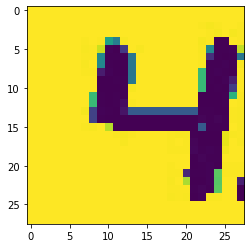

In [0]:
image_dir = '/content/drive/My Drive/TARP PROJECT/Datasets_digits/4'
image_name = '11f9cd65defaad688cb0c0efb4f2b5e00fcfa61d_3.jpg'

print("Predicted Value : " , test_image(image_dir, image_name))
print("Actual Value : " , '4')

#### Test Example 2

Test Image-->
(28, 28, 3)
Final test image shape : 
(1, 28, 28, 1)
Predicted Value :  5
Actual Value :  5


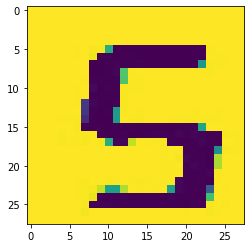

In [0]:
image_dir = '/content/drive/My Drive/TARP PROJECT/Datasets_digits/5'
image_name = '23c7d2ed30476359326e1a624be570afb98e2699_2.jpg'

print("Predicted Value : " , test_image(image_dir, image_name))
print("Actual Value : " , '5')

#### Test Example 3

Test Image-->
(28, 28, 3)
Final test image shape : 
(1, 28, 28, 1)
Predicted Value :  8
Actual Value :  8


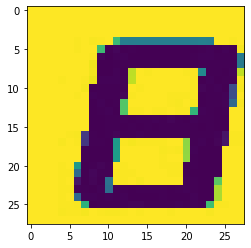

In [0]:
image_dir = '/content/drive/My Drive/TARP PROJECT/Datasets_digits/8'
image_name = '0cfd795fed59753d223f222934728e9a788dd9ba_2.jpg'

print("Predicted Value : " , test_image(image_dir, image_name))
print("Actual Value : " , '8')

#### Test Example 4

Test Image-->
(28, 28, 3)
Final test image shape : 
(1, 28, 28, 1)
Predicted Value :  4
Actual Value :  1


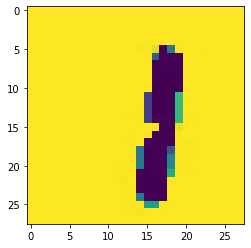

In [0]:
image_dir = '/content/drive/My Drive/TARP PROJECT/Datasets_digits/1'
image_name = '1e563e76027dc5e3582da0669f66ba32653345bd_1.jpg'

print("Predicted Value : " , test_image(image_dir, image_name))
print("Actual Value : " , '1')

So we got 3 out 4 of correct images which is pretty good.

## End to End testing of the model

In [0]:
def show_original_image(image_path):
  img = cv2.imread(image_path)

  plt.imshow(img)
  plt.title('Original Image')

  plt.show()

In [0]:
def get_image_digits(src_path, filename):
  
  test_sample_file = '/content/drive/My Drive/TARP PROJECT/images_data.csv'
  df_images = pd.read_csv('/content/drive/My Drive/TARP PROJECT/images_data.csv')

  image_test = df_images.loc[df_images['image'] == file_name]

  labels = [image_test.cadran_1, image_test.cadran_2, image_test.cadran_3, image_test.cadran_4]
  cutter = cutDigits(src_file_name=src_path, labels=labels)

  cutter.get_bounding_box_dummy()
  ax, fig = plt.subplots(2,2)
  for i in range(4):
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(cutter.boxes[i], kernel, iterations = 1)
    eroded = cv2.erode(dilated, kernel, iterations = 1)
    dst = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel)
    blur = cv2.medianBlur(dst, 3)


    plt.subplot(2,2,i+1)
    plt.imshow(blur)
    cutter.boxes[i] = blur

  plt.suptitle('Digits extracted')
  plt.show()

  return cutter.boxes

In [0]:
def test_digits(digit):

  resized_image = cv2.resize(digit,(28,28))
  mg = cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
  inverted_image = np.invert(mg)
  inverted_image = inverted_image/255
  inverted_image = inverted_image.astype('float64')

  plt.imshow(inverted_image)
  curr_shape = inverted_image.shape
  img_test = inverted_image.reshape((-1,curr_shape[0], curr_shape[1], 1))
  
  prediction = model.predict(img_test)
  return np.argmax(prediction[0]), mg

In [0]:
test_sample_folder = '/content/drive/My Drive/TARP PROJECT/Test Samples/Dataset_Frames/'

for i in os.listdir(test_sample_folder)[0:5]:
  print(test_sample_folder + i)
  

/content/drive/My Drive/TARP PROJECT/Test Samples/Dataset_Frames/017aaf5f05f9cb27557ba2b10121fdd7b910a406.jpg
/content/drive/My Drive/TARP PROJECT/Test Samples/Dataset_Frames/17bf0739bf830b20ef259d18788e74d4209d922b.jpg
/content/drive/My Drive/TARP PROJECT/Test Samples/Dataset_Frames/16ddf64847f3343c0b741858e8f499cf13e8efbf.jpg
/content/drive/My Drive/TARP PROJECT/Test Samples/Dataset_Frames/16c0acbf55777702a5490a805d18d8fd60d01da7.jpg
/content/drive/My Drive/TARP PROJECT/Test Samples/Dataset_Frames/1c9aa921313f8b3b8dfde6130c91d9de4391570b.jpg


#### Test Example 1

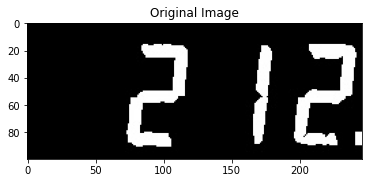

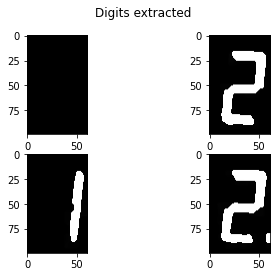

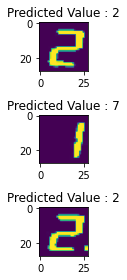

In [0]:
image_path = '/content/drive/My Drive/TARP PROJECT/Test Samples/Dataset_Frames/1c9408957a827a1bce36d9057d8a075e7c0b706f.jpg'
filename = '1c9408957a827a1bce36d9057d8a075e7c0b706f.jpg'

show_original_image(image_path)
digits = get_image_digits(image_path, filename)

fig, ax = plt.subplots(3)  
  
preds1, pred_img = test_digits(digits[1])
ax[0].imshow(pred_img)
ax[0].set_title("Predicted Value : " + str(preds1))

preds2, pred_img = test_digits(digits[2])
ax[1].imshow(pred_img)
ax[1].set_title("Predicted Value : " + str(preds2))

preds3, pred_img = test_digits(digits[3])
ax[2].imshow(pred_img)
ax[2].set_title("Predicted Value : " + str(preds3))

fig.tight_layout()

plt.show()

#### Test Example 2

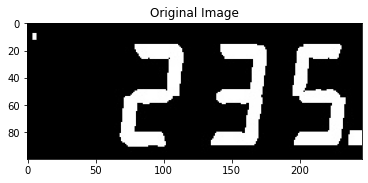

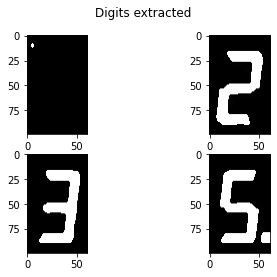

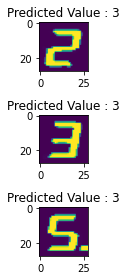

In [0]:
image_path = '/content/drive/My Drive/TARP PROJECT/Test Samples/Dataset_Frames/17bf0739bf830b20ef259d18788e74d4209d922b.jpg'
filename = '17bf0739bf830b20ef259d18788e74d4209d922b.jpg'

show_original_image(image_path)
digits = get_image_digits(image_path, filename)

fig, ax = plt.subplots(3)  
  
preds1, pred_img = test_digits(digits[1])
ax[0].imshow(pred_img)
ax[0].set_title("Predicted Value : " + str(preds1))

preds2, pred_img = test_digits(digits[2])
ax[1].imshow(pred_img)
ax[1].set_title("Predicted Value : " + str(preds2))

preds3, pred_img = test_digits(digits[3])
ax[2].imshow(pred_img)
ax[2].set_title("Predicted Value : " + str(preds3))

fig.tight_layout()

plt.show()

#### Test Example 3

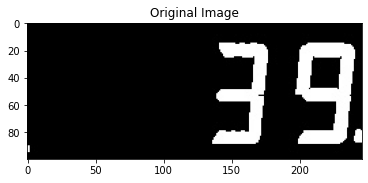

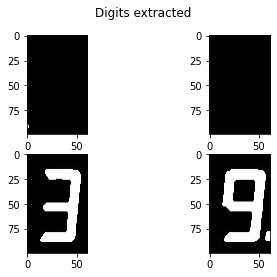

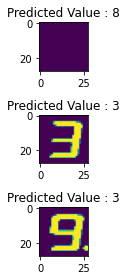

In [0]:
image_path = '/content/drive/My Drive/TARP PROJECT/Test Samples/Dataset_Frames/16ddf64847f3343c0b741858e8f499cf13e8efbf.jpg'
filename = '16ddf64847f3343c0b741858e8f499cf13e8efbf.jpg'

show_original_image(image_path)
digits = get_image_digits(image_path, filename)

fig, ax = plt.subplots(3)  
  
preds1, pred_img = test_digits(digits[1])
ax[0].imshow(pred_img)
ax[0].set_title("Predicted Value : " + str(preds1))

preds2, pred_img = test_digits(digits[2])
ax[1].imshow(pred_img)
ax[1].set_title("Predicted Value : " + str(preds2))

preds3, pred_img = test_digits(digits[3])
ax[2].imshow(pred_img)
ax[2].set_title("Predicted Value : " + str(preds3))

fig.tight_layout()

plt.show()

#### Test Example 4

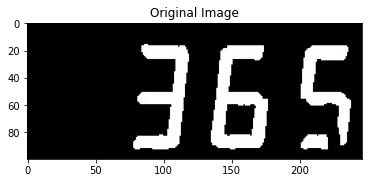

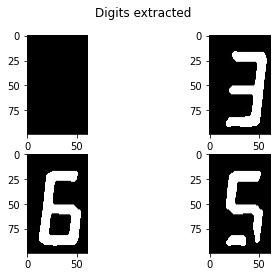

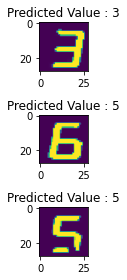

In [0]:
image_path = '/content/drive/My Drive/TARP PROJECT/Test Samples/Dataset_Frames/017aaf5f05f9cb27557ba2b10121fdd7b910a406.jpg'
filename = '017aaf5f05f9cb27557ba2b10121fdd7b910a406.jpg'

show_original_image(image_path)
digits = get_image_digits(image_path, filename)

fig, ax = plt.subplots(3)  
  
preds1, pred_img = test_digits(digits[1])
ax[0].imshow(pred_img)
ax[0].set_title("Predicted Value : " + str(preds1))

preds2, pred_img = test_digits(digits[2])
ax[1].imshow(pred_img)
ax[1].set_title("Predicted Value : " + str(preds2))

preds3, pred_img = test_digits(digits[3])
ax[2].imshow(pred_img)
ax[2].set_title("Predicted Value : " + str(preds3))

fig.tight_layout()

plt.show()

#### Test Example 5

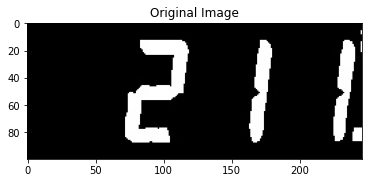

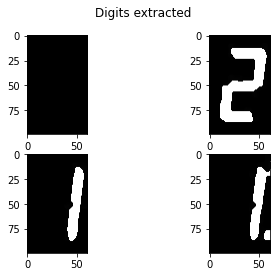

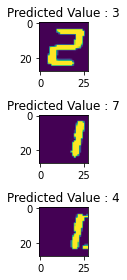

In [0]:
image_path = '/content/drive/My Drive/TARP PROJECT/Test Samples/Dataset_Frames/1c9aa921313f8b3b8dfde6130c91d9de4391570b.jpg'
filename = '1c9aa921313f8b3b8dfde6130c91d9de4391570b.jpg'

show_original_image(image_path)
digits = get_image_digits(image_path, filename)

fig, ax = plt.subplots(3)  

preds1, pred_img = test_digits(digits[1])
ax[0].imshow(pred_img)
ax[0].set_title("Predicted Value : " + str(preds1))

preds2, pred_img = test_digits(digits[2])
ax[1].imshow(pred_img)
ax[1].set_title("Predicted Value : " + str(preds2))

preds3, pred_img = test_digits(digits[3])
ax[2].imshow(pred_img)
ax[2].set_title("Predicted Value : " + str(preds3))

fig.tight_layout()

plt.show()

### Final testing with real life example

In [0]:
def show_frame_image(img):
  plt.imshow(img)
  plt.title('processed frame image')

#### The complete OCR procedure

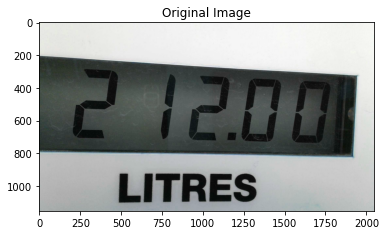

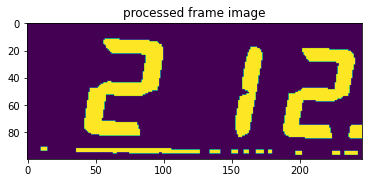

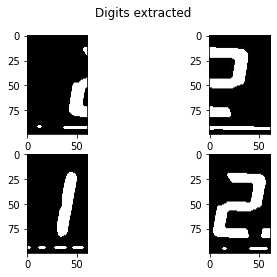

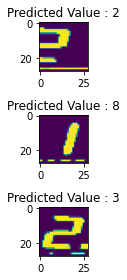

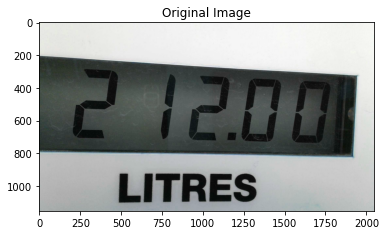

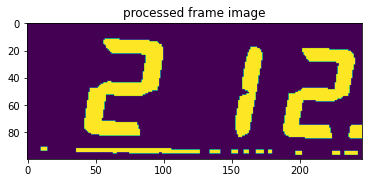

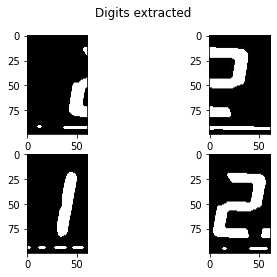

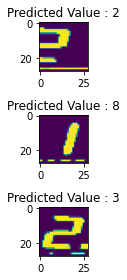

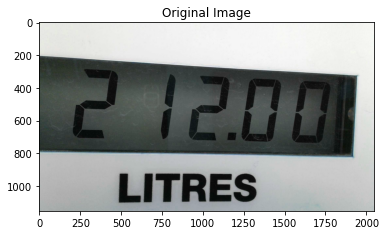

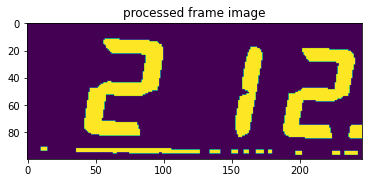

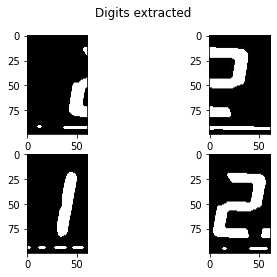

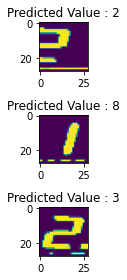

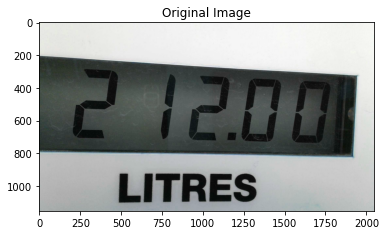

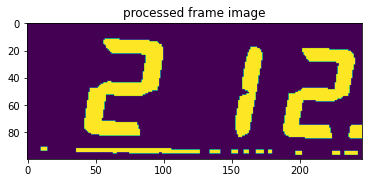

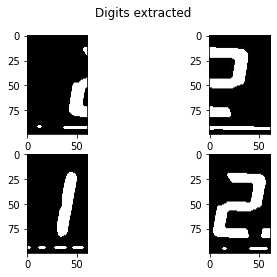

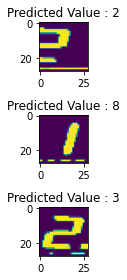

1 loop, best of 3: 1.44 s per loop


In [0]:
%%timeit
import sys
sys.path.append('/content/drive/My Drive/TARP PROJECT')

from util import frameExtractor


dataset_dir = '/content/drive/My Drive/TARP PROJECT/Datasets/HQ_digital/'
dest_dir = '/content/drive/My Drive/TARP PROJECT/'
raw_image = '4a322d88fca63d74fb42eee30846e99735c17905.jpg'

show_original_image(dataset_dir + raw_image)

f = frameExtractor(image=None,
                        src_file_name=dataset_dir + raw_image,
                        dst_file_name = dest_dir + raw_image,
                        return_image=True,
                        output_shape=(400, 100))

frame_image = f.extractAndSaveFrame()

show_frame_image(frame_image)

digits = get_image_digits(dest_dir + raw_image, raw_image)

fig, ax = plt.subplots(3)  
  
preds1, pred_img = test_digits(digits[1])
ax[0].imshow(pred_img)
ax[0].set_title("Predicted Value : " + str(preds1))

preds2, pred_img = test_digits(digits[2])
ax[1].imshow(pred_img)
ax[1].set_title("Predicted Value : " + str(preds2))

preds3, pred_img = test_digits(digits[3])
ax[2].imshow(pred_img)
ax[2].set_title("Predicted Value : " + str(preds3))

fig.tight_layout()

plt.show()